### Web Scraping with Beautiful Soup

Firstly import all necessary libs:

In [1]:
from bs4 import BeautifulSoup
import requests
from urllib import request
import numpy as np
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt

/Users/anastasiiatolstokorova/Code/web-scraping/venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Let's make a request to get the html page and save it's content:

In [2]:
webpage_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html', "html.parser")
webpage_content = webpage_response.content

Let's convert the HTML document to the BeautifulSoup object:

In [3]:
soup = BeautifulSoup(webpage_content)

In [4]:
#print the first input of specified tag

print(soup.div)
print(soup.table)


<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>


In [5]:
#get the name of the tag
print(soup.table.name)
print(soup.div.name)
print(soup.script.name)


table
div
script


In [6]:
# print attributes of the tag:
print(soup.table.attrs)
print(soup.div.attrs)
print(soup.script.attrs)

{'class': ['infoTable']}
{'id': 'banner'}
{'async': '', 'src': '/cdn-cgi/bm/cv/669835187/api.js'}


In [7]:
# get the string inside of the tag

print('All tag: ', soup.h1,)
print('Text of the tag: ', soup.h1.string, '\n---------------------')


print('All tag: ', soup.td)
print('Text of the tag: ', soup.td.string)

All tag:  <h1>Cacao Ratings</h1>
Text of the tag:  Cacao Ratings 
---------------------
All tag:  <td>Compiled ratings of over 1700 Chocolate bars</td>
Text of the tag:  Compiled ratings of over 1700 Chocolate bars


In [8]:
# names of all tags

dict(Counter([tag.name for tag in soup.find_all()]))

{'html': 1,
 'head': 1,
 'meta': 1,
 'style': 1,
 'script': 3,
 'body': 1,
 'div': 3,
 'h1': 1,
 'table': 2,
 'tr': 1798,
 'td': 16166,
 'img': 1}

In [9]:
# tag's children

[child for child in soup.div.children]

['\n', <h1>Cacao Ratings</h1>, '\n']

In [10]:
# h1's parent

soup.h1.parent

<div id="banner">
<h1>Cacao Ratings</h1>
</div>

In [11]:
# find all of the occurrences of tag 'td':
  
soup.find_all('td')

[<td>Compiled ratings of over 1700 Chocolate bars</td>,
 <td>Ratings are from 1-5</td>,
 <td class="Company">Company 
                (Maker-if known)
             </td>,
 <td class="Origin">Specific Bean Origin
                or Bar Name
             </td>,
 <td class="REF">REF</td>,
 <td class="ReviewDate">Review
                Date
             </td>,
 <td class="CocoaPercent">Cocoa
                Percent
             </td>,
 <td class="CompanyLocation">Company
                Location
             </td>,
 <td class="Rating">Rating</td>,
 <td class="BeanType">Bean
                Type
             </td>,
 <td class="BroadBeanOrigin">Broad Bean
                Origin
             </td>,
 <td class="Company">A. Morin</td>,
 <td class="Origin">Agua Grande</td>,
 <td class="REF">1876</td>,
 <td class="ReviewDate">2016</td>,
 <td class="CocoaPercent">63%</td>,
 <td class="CompanyLocation">France</td>,
 <td class="Rating">3.75</td>,
 <td class="BeanType"> </td>,
 <td class="BroadBeanOr

In [12]:
# find all of the occurrences of tags 'td' and 'div':
  
soup.find_all(['div', 'img'])

[<div id="banner">
 <h1>Cacao Ratings</h1>
 </div>,
 <div id="infoContainer">
 <table class="infoTable">
 <tr>
 <td>Compiled ratings of over 1700 Chocolate bars</td>
 </tr>
 <tr>
 <td>Ratings are from 1-5</td>
 </tr>
 </table>
 </div>,
 <div id="picContainer">
 <img id="chocolate" src="chocolate.jpg"/>
 </div>,
 <img id="chocolate" src="chocolate.jpg"/>]

## Compile data

In [13]:
# create list of classes (columns of the future dataset)

classes = [td.attrs['class'][0] for td in soup.find_all('td')[2:11]]

# create dictionary with target data

cacao_dict_data = {}
for column in classes:
    cacao_dict_data[column] = [i.text for i in soup.find_all(attrs={'class':column})][1:]

In [14]:
cacao_dict_data

{'Company': ['A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'A. Morin',
  'Acalli',
  'Acalli',
  'Adi',
  'Adi',
  'Adi',
  'Adi',
  'Aequare (Gianduja)',
  'Aequare (Gianduja)',
  'Ah Cacao',
  "Akesson's (Pralus)",
  "Akesson's (Pralus)",
  "Akesson's (Pralus)",
  'Alain Ducasse',
  'Alain Ducasse',
  'Alain Ducasse',
  'Alain Ducasse',
  'Alain Ducasse',
  'Alexandre',
  'Alexandre',
  'Alexandre',
  'Alexandre',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Altus aka Cao Artisan',
  'Amano',
  'Amano',
  'Amano',
  'Amano',
  'A

In [15]:
# Create pandas dataframe from dict

cacao_dataframe = pd.DataFrame(cacao_dict_data)
cacao_dataframe

,Company,Origin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.5,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


# Data analysis

Let's inspect cacao data and its types:

In [16]:
# data info

cacao_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          1795 non-null   object
 1   Origin           1795 non-null   object
 2   REF              1795 non-null   object
 3   ReviewDate       1795 non-null   object
 4   CocoaPercent     1795 non-null   object
 5   CompanyLocation  1795 non-null   object
 6   Rating           1795 non-null   object
 7   BeanType         1795 non-null   object
 8   BroadBeanOrigin  1795 non-null   object
dtypes: object(9)
memory usage: 126.3+ KB


In [17]:
# types of data

[[type(cacao_dataframe[column][0]), column] for column in cacao_dataframe.columns]


[[str, 'Company'],
 [str, 'Origin'],
 [str, 'REF'],
 [str, 'ReviewDate'],
 [str, 'CocoaPercent'],
 [str, 'CompanyLocation'],
 [str, 'Rating'],
 [str, 'BeanType'],
 [str, 'BroadBeanOrigin']]

So, as we have all string data types, although some of them expected to be numerical. So, let's transform them:

In [18]:
# remove '%' sign from values in column 'CocoaPercent'

cacao_dataframe.CocoaPercent = cacao_dataframe.CocoaPercent.apply(lambda x : x[:-1])


In [19]:
# transform numeric data into np.float64 type

cacao_dataframe[['REF', 'ReviewDate', 'CocoaPercent', 'Rating']] = cacao_dataframe[['REF', 'ReviewDate', 'CocoaPercent', 'Rating']].astype(np.float64)


Let's check again types:

In [20]:
[type(cacao_dataframe[column][0]) for column in cacao_dataframe.columns]

[str,
 str,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 str,
 numpy.float64,
 str,
 str]

So, now let's describe numeric data:

In [21]:
cacao_dataframe.describe()

,REF,ReviewDate,CocoaPercent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


Plot histogram that represents the distribution of ratings data:

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

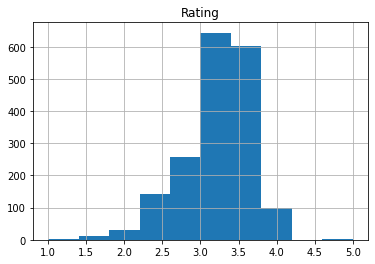

In [22]:
cacao_dataframe.hist('Rating')

## Find chocolatier who makes the best chocolate

In [23]:
#First 10 companies with the best mean rating
pd.DataFrame(data = cacao_dataframe.groupby("Company").Rating.mean()[:10])



,Rating
Company,
A. Morin,3.380435
AMMA,3.500000
Acalli,3.750000
Adi,3.250000
Aequare (Gianduja),2.875000
Ah Cacao,3.000000
Akesson's (Pralus),3.083333
Alain Ducasse,2.700000
Alexandre,3.500000


### Find correlation between Cocoa percentage and rating:

<AxesSubplot:xlabel='CocoaPercent', ylabel='Rating'>

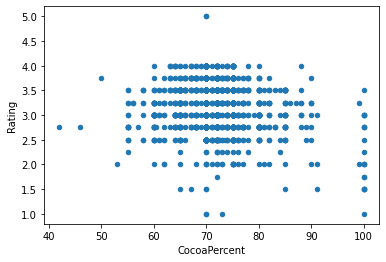

In [24]:
cacao_dataframe.plot('CocoaPercent', 'Rating', kind = 'scatter')

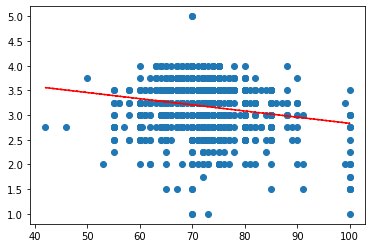

In [25]:
plt.scatter(cacao_dataframe.CocoaPercent, cacao_dataframe.Rating)

z = np.polyfit(cacao_dataframe.CocoaPercent, cacao_dataframe.Rating, 1)
line_function = np.poly1d(z)
plt.plot(cacao_dataframe.CocoaPercent, line_function(cacao_dataframe.CocoaPercent), "r--")

plt.show()

## Next questions:
Where are the best cocoa beans grown? Which countries produce the highest-rated bars?